In [1]:
# %run ../signalverarbeitung-gui/gui_jupyter_main.py
# %load ../signalverarbeitung-gui/gui_jupyter_main.py

In [2]:
# import gui_jupyter_main as GUI
# import sys

# app = GUI.QtGui.QApplication(sys.argv)
# MainWindow = GUI.QtGui.QMainWindow()
# ui = GUI.Ui_MainWindow()
# ui.setupUi(MainWindow)
# MainWindow.show()
# sys.exit(app.exec_())


In [3]:
# %matplotlib notebook
# import jupyter_main as GUI
# GUI.initMain()

<IPython.core.display.Javascript object>


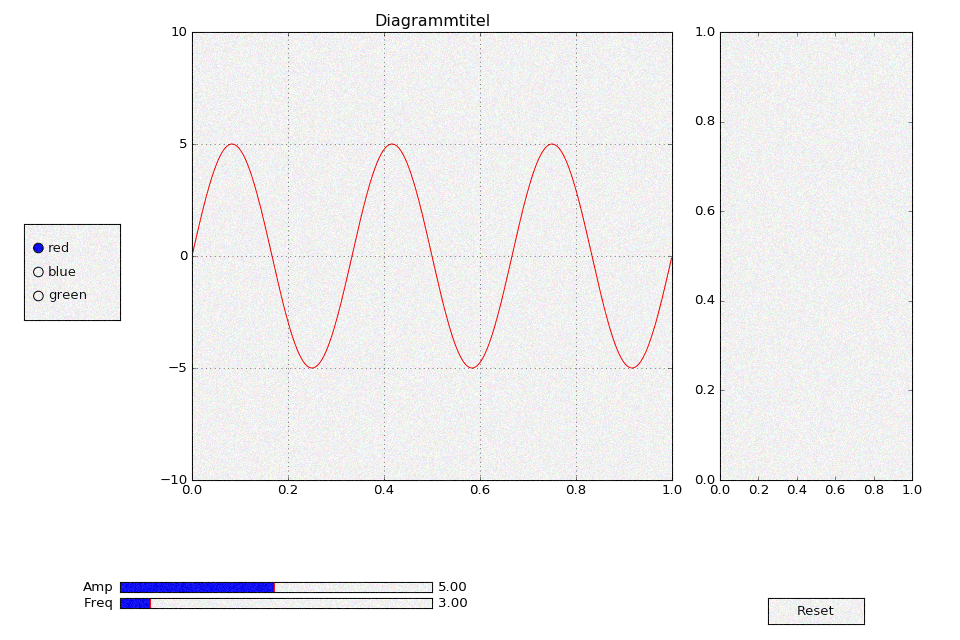

In [75]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as wdgt

# Reset der Slider
def reset(event):
    sfreq.reset()
    samp.reset()

# Ändern der Linienfarbe
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()

# Update des Graphen
def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp * np.sin(2 * np.pi * freq * t))
    fig.canvas.draw_idle()


axcolor = 'white' # Hintergrundfarbe

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(left=0.20, right=0.7, bottom=0.25, top=0.95)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0 * np.sin(2 * np.pi * f0 * t)

l, = plt.plot(t, s, lw=1, color='red')

plt.axis([0, 1, -10, 10])
plt.grid()
plt.title("Diagrammtitel")
fig.canvas.set_window_title("Window1")

axfreq = plt.axes([0.125, 0.05, 0.325, 0.015], axisbg=axcolor)
axamp = plt.axes([0.125, 0.075, 0.325, 0.015], axisbg=axcolor)
options = plt.axes([0.75, 0.25, 0.20, 0.70],axisbg=axcolor)

# Erstellen der Slider
sfreq = wdgt.Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = wdgt.Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


sfreq.on_changed(update)
samp.on_changed(update)

# Erstellen des Reset-Buttons
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = wdgt.Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.10, 0.15], axisbg=axcolor)
radio = wdgt.RadioButtons(rax, ('red', 'blue', 'green'), active=0)
radio.on_clicked(colorfunc)

plt.show()